<p style="background-color:limegreen;font-family:newtimeroman;font-size:400%;color:white;text-align:center;border-radius:20px 20px;"><b>Plotly Notebook</b></p>

**Plotly is an interactive visualization library that brings a new breath to data visualization in the modern data science world. Plotly; It is compatible with popular programming languages ​​such as Python, R and JavaScript, and dynamically presents data analyzes and results to the user.**

**<b>Contains:</b>**
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Data Set</a></li>
<li><a href="#create-graphs">Creating Graphs With Plotly</a></li>
<li><a href="#plotly-animation">Animation With Plotly</a></li>
</ul>

<a id='import-library'></a>
# <font color='mediumseagreen'> <b>Importing Libraries</b><font color='black'> 

In [13]:
# !pip install plotly
# !pip install dash
# !pip install wordcloud
# !pip install cufflinks
# !pip install missingno

In [15]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import missingno

import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True) 

import plotly.graph_objs as go 
import plotly.express as px 

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

import warnings
warnings.filterwarnings("ignore")

<a id='loading-dataset'></a>
# <font color='mediumseagreen'> <b>Loading The Data Set</b><font color='black'> 

In [17]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [19]:
# Let's get the first 100 rows of timesData data to use in plotly.
df = timesData.iloc[:100, :]

<a id='create-graphs'></a>
# <font color='mediumseagreen'> <b>Creating Graphs With Plotly</b><font color='black'> 

## <font color='lightseagreen'> <b>Line Chart</b><font color='black'> 

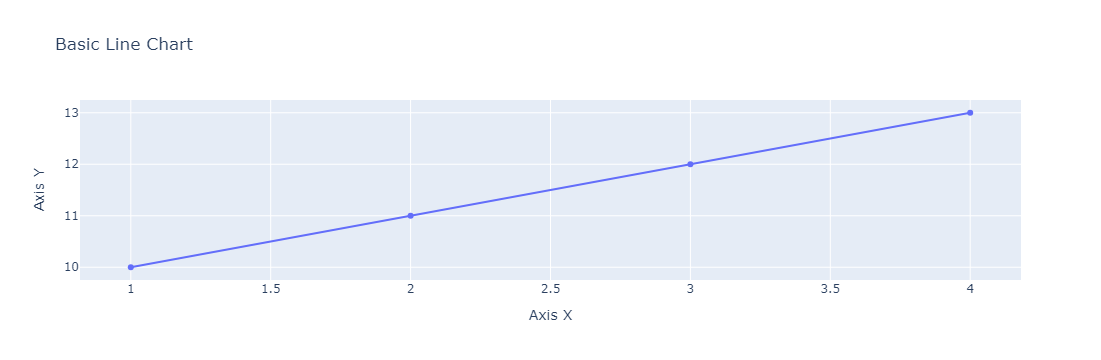

In [21]:
import plotly.graph_objects as go

# Data
trace = go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13])

# Layout
layout = go.Layout(title='Basic Line Chart', xaxis=dict(title='Axis X'), yaxis=dict(title='Axis Y'))

# Figure
fig = go.Figure(data=[trace], layout=layout)

# Show
fig.show()

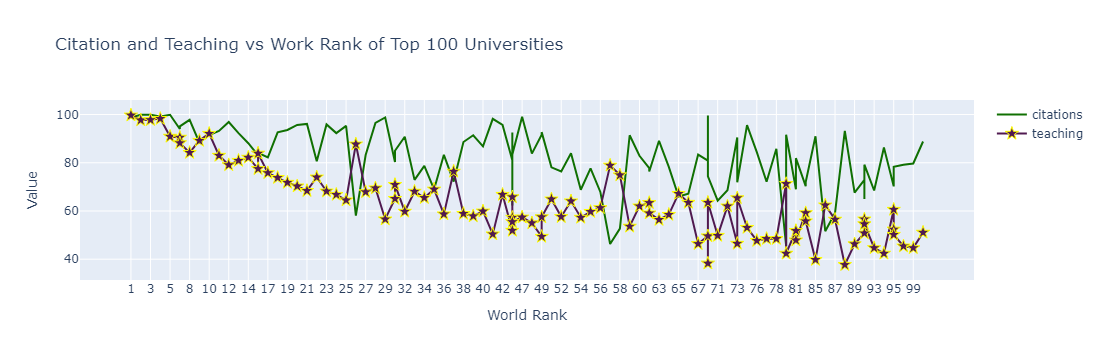

In [23]:
#plt.style.use("ggplot")

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)

trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", 
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)
iplot(fig)

## <font color='lightseagreen'> <b>Scatter Plot</b><font color='black'> 

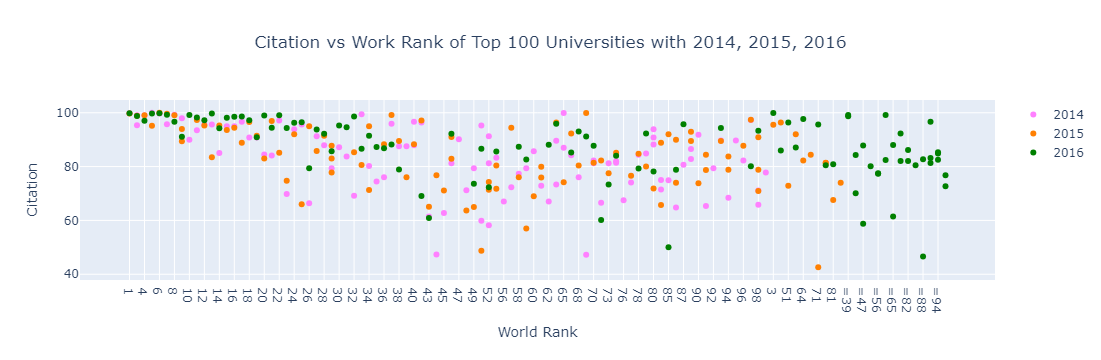

In [25]:
# Filtering the data to include the top 100 universities' citation counts for the years 2014, 2015, and 2016.
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)

trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)

trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

## <font color='lightseagreen'> <b>Bar Plot</b><font color='black'> 

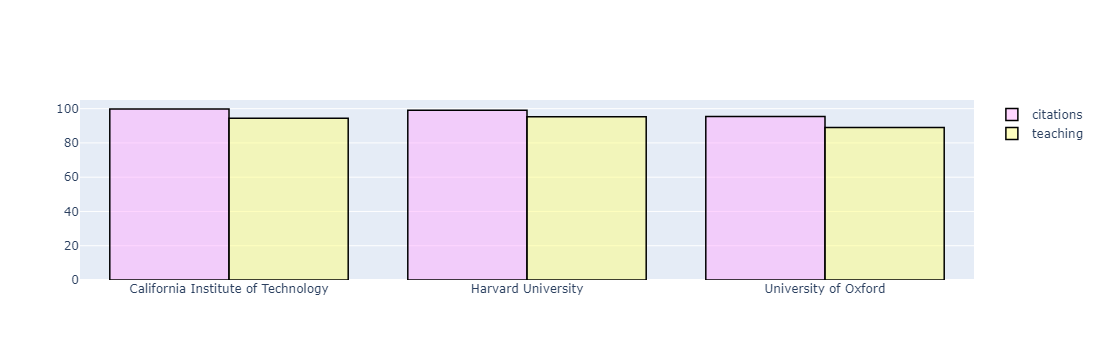

In [27]:
# Data
df2014 = timesData[timesData.year == 2014].iloc[:3,:]


import plotly.graph_objs as go

trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## <font color='lightseagreen'> <b>Pie Chart</b><font color='black'> 

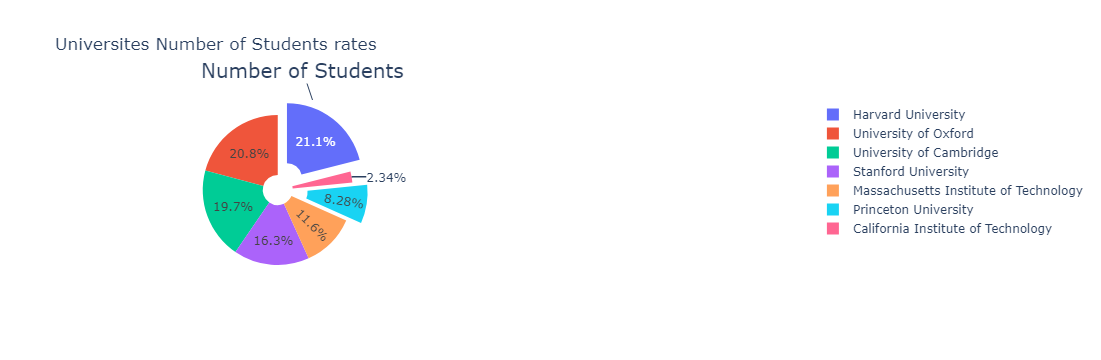

In [29]:
# Get the data for 2016 and the first 7 records.
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

# Take the num_students column, remove the commas and convert the string to float.
df = df2016.num_students
df1 = (df.str.replace(",", "")).astype("float")
df2 = list((df.str.replace(",", "")).astype("float"))

# With list comprehension, convert the values ​​in the num_students column to float.
pie_list = [float(each.replace(",", "")) for each in df2016.num_students]

# Place their names in the pie chart slices with the labels variable.
labels = df2016.university_name

# Figure 
fig = {
    "data" : [
        {
            "values" : pie_list,  # Yüzdelik dilimleri belirleyecek olan değerler.
            "labels" : labels,  # Her bir dilimin etiketi.
            "domain" : {"x": [0, .5]},  # Grafikteki konumu.
            "name" : "Number Of Students Rates",  # Grafik ismi.
            "hoverinfo" : "label + percent",  # Fareyle üzerine gelindiğinde gösterilecek bilgi.
            "hole" : .2,  # Ortadaki boşluğun büyüklüğü, bu bir donut grafiği yapar.
            "type" : "pie",  # Grafik türü.
            "pull" : [0,0,0,0,0, 0.2, 0.2]  # Belirli dilimleri vurgulamak için çekiyoruz, burada son iki dilim çekilmiş.
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",  # Ana başlık.
        "annotations" : [
            {"font" : {"size" : 20},  # Font büyüklüğü.
             "text" : "Number of Students",  # Yorum yazısı.
             "x" : 0.3,  # X konumu.
             "y" : 1  # Y konumu.
            },
        ]
    }
}

# Show
iplot(fig)

## <font color='lightseagreen'> <b>Buble Chart</b><font color='black'> 

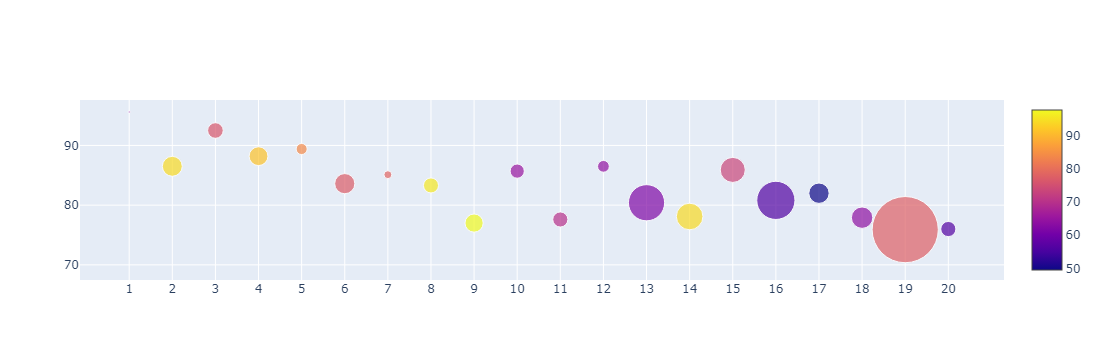

In [31]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]  # Choose the top 20 universities in the world in 2016

num_students_size  = [float(each.replace(",", ".")) for each in df2016.num_students]  # Convert num_students column to float type

international_color = [float(each) for each in df2016.international]  # convert international column to float type

data = [  # Define the data to create a scatter plot
    {
        "y" : df2016.teaching,  # use teaching column as y axis
        "x" : df2016.world_rank,  # use world_rank column as x-axis
        "mode" : "markers",  # use markers mode for scatter plot
        "marker" : {
            "color" : international_color,  # set marker color with international_color list
            "size" : num_students_size, # set marker size with num_students_size list
            "showscale" : True
        },
        "text" : df2016.university_name  # show university name for each marker
    }
]
iplot(data)

## <font color='lightseagreen'> <b>Histogram</b><font color='black'> 

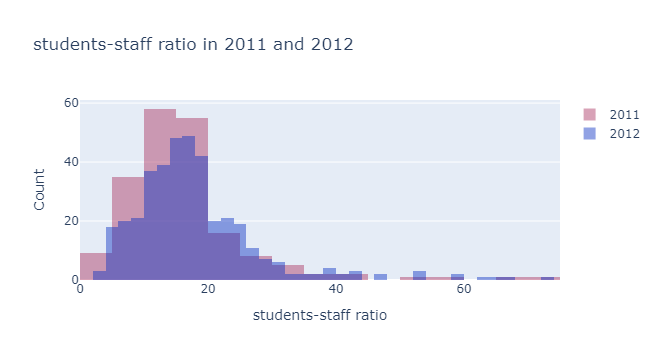

In [33]:
# 1. Assigns the student-staff ratio of 2011 to the x2011 variable.
x2011 = timesData.student_staff_ratio[timesData.year == 2011]

# 2. Assigns the student-staff ratio for 2012 to the x2012 variable.
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

# 3. Creates a histogram for the year 2011.şturur.
trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)')
)

# 4. Creates another histogram for the year 2012.
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)')
)

# 5. Encloses two histograms in one data list.
data = [trace1, trace2]

# 6. Sets the layout and titles of the chart. 
layout = go.Layout(
    barmode='overlay',  # Allows two histograms to overlap.
    title=' students-staff ratio in 2011 and 2012',
    xaxis=dict(title='students-staff ratio'),
    yaxis=dict(title='Count')
)

# 7. Figure
fig = go.Figure(data=data, layout=layout)

# 8. Show
iplot(fig)

## <font color='lightseagreen'> <b>Word Cloud</b><font color='black'> 

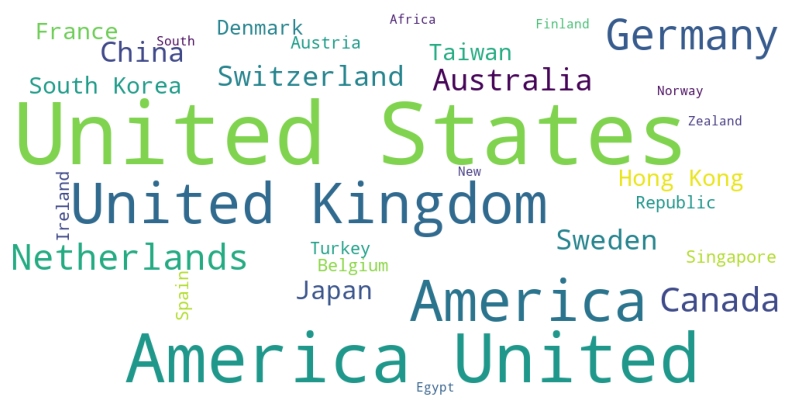

In [35]:
# 1. Assigns the countries for 2011 to the x2011 variable.
x2011 = timesData.country[timesData.year == 2011]

# 2. Creates a 10x10 subplot.
plt.subplots(figsize = (10, 10))

# 3. Creates a word cloud by combining countries in the x2011 variable.
wordcloud = WordCloud(
    background_color= "white",
    width = 1000,
    height= 500
).generate(" ".join(x2011))

# 4. Shows the created word cloud.
plt.imshow(wordcloud)

# 5. Turns off the axes of the chart so only the word cloud is visible.
plt.axis("off")

# 6. Save the graph named "graph.png" on your computer.
plt.savefig("graph.png")

# 7. Show
plt.show()

## <font color='lightseagreen'> <b>Box Plot</b><font color='black'> 

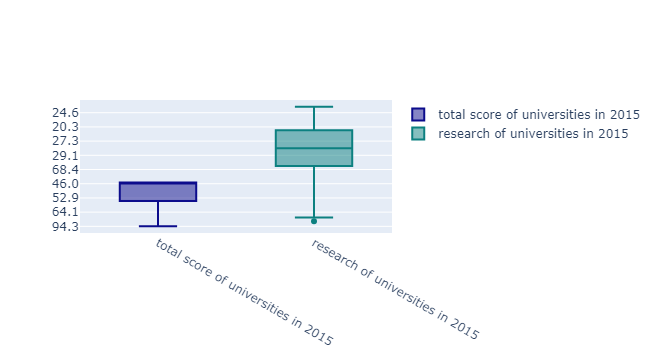

In [37]:
# 1. Assigns the data for 2015 to the x2015 variable.
x2015 = timesData[timesData.year == 2015]

# 2. Creates a Box Plot using x2015.total_score data.
trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(color = 'rgb(12, 12, 140)')
)

# 3. Creates a Box Plot using x2015.research data.
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(color = 'rgb(12, 128, 128)')
)

# 4. Collects the created Box Plots in a list.
data = [trace0, trace1]

# 5. Show
iplot(data)

## <font color='lightseagreen'> <b>Scatter Matrix Plots</b><font color='black'> 

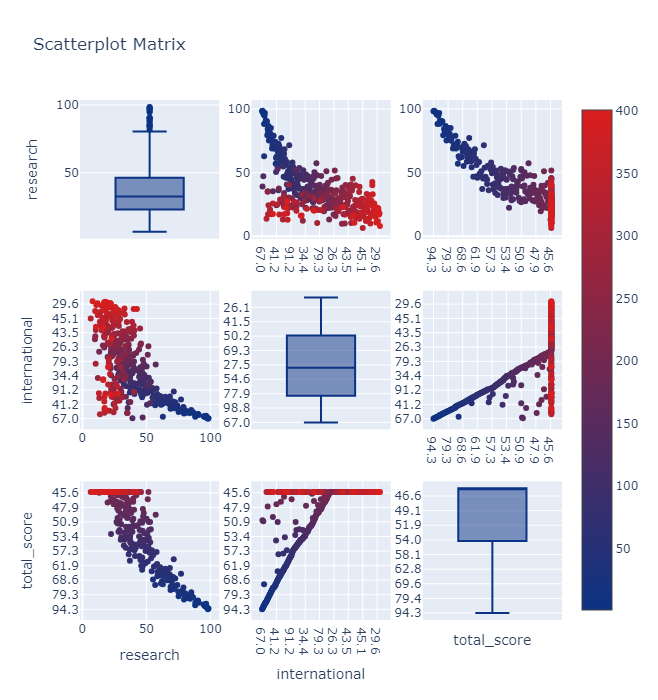

In [41]:
# 1. Imports Plotly's figure_factory module.
import plotly.figure_factory as ff

# 2. Assigns the data for 2015 to the dataframe variable.
dataframe = timesData[timesData.year == 2015]

# 3. Selects certain columns from the dataframe variable and assigns them to the data2015 variable.
data2015 = dataframe.loc[:,["research","international", "total_score"]]

# 4. data2015 Adds a new "index" column to the DataFrame and assigns consecutive numbers to this column.
data2015["index"] = np.arange(1,len(data2015)+1)

# 5. Creates scatter plot matrix using data2015 datas
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat', height=700, width=700)

# 6. Show
iplot(fig)

<a id='plotly-animation'></a>
# <font color='mediumseagreen'> <b>Animation With Plotly</b><font color='black'> 

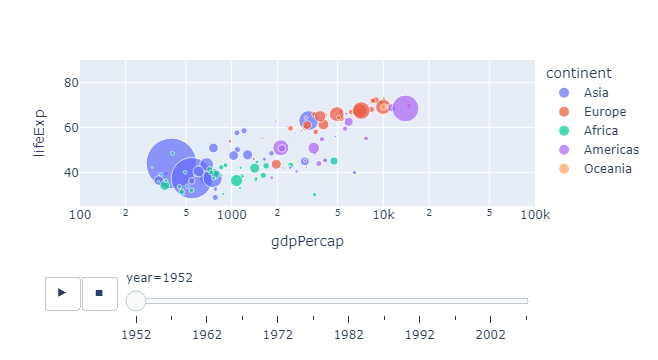

In [43]:
import plotly.express as px
df = px.data.gapminder()

# Creates a scatter graphic using the px.scatter function. 
# In this chart, income per capita (GDP per Capita) is on the x-axis, 
# On the y-axis is life expectancy.
# Animation is added according to years with animation_frame. 
# With animation_group, countries are designated as animation groups.
# With the size parameter, the size of the points is adjusted according to the population of the country.
# With the color parameter, the points are colored according to their continents.
# hover_name shows the name of the country when hovering over it.
# Logarithmic scale is used for the x-axis with log_x=True.
# The maximum size of the point is determined with size_max=55.
# Value ranges for the x and y axes are determined with range_x and range_y.
px.scatter(df, 
           x="gdpPercap",
           y="lifeExp",
           animation_frame="year",
           animation_group="country",
           size="pop",
           color="continent",
           hover_name="country",
           log_x=True,
           size_max=55,
           range_x=[100,100000],
           range_y=[25,90])

In conclusion; As one of the pioneers of the innovative approach, Plotly makes it possible not only to create graphs but also to interact with these graphs. This both increases the quality of information presentation and allows more in-depth analysis.